In [1]:
# ---------------------------- Header -----------------------------
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import re
import pandas as pd
import make_data as md
from make_data import dataset
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-v0_8-whitegrid')
%tensorboard

UsageError: Line magic function `%tensorboard` not found.


In [8]:
# ----------------- Random training sets ------------------------
import random 
random_numbers = random.sample(range(34), 16)
print( random_numbers )
testsets = [ random_numbers[i*4:i*4+4] for i in range(4)]
print(testsets)

[32, 23, 11, 12, 4, 2, 1, 7, 26, 0, 13, 17, 5, 9, 22, 3]
[[32, 23, 11, 12], [4, 2, 1, 7], [26, 0, 13, 17], [5, 9, 22, 3]]


In [4]:
# ----------------- Random training sets ------------------------
import random 
import os
all_sets = list()
for j in range(20):
    for i in range(20):
        name = f'Data/Final_set/S{j}_C{i}'
        if not os.path.isdir(name): continue
        all_sets.append([j,i])

testsets = list()
remain_set = all_sets.copy()
for i in range(4):
    

    each_sets = list()
    choice_set = remain_set.copy()
    for j in range(4):
        set = random.sample(choice_set,1)[0]
        choice_set = [s for s in choice_set if not (set[0] in s or set[1] in s)] 
        each_sets.append(set)

    remain_set = [s for s in remain_set if not s[0] in np.array(each_sets)[:,0]]
    testsets.append(each_sets)
#testsets = [ test_points[i*4:i*4+4] for i in range(4)]
print(testsets)

[[[4, 10], [1, 1], [9, 3], [2, 0]], [[5, 4], [7, 19], [12, 6], [13, 15]], [[10, 13], [11, 19], [18, 16], [15, 4]], [[14, 19], [3, 1], [16, 11], [0, 5]]]


In [2]:
# ------------------- All results -------------------
folderpath = 'MachineLearning/outputs'
file_list = os.listdir(folderpath)

for filename in file_list:
    test_error = list()
    linf_error = list()
    train_error = list()
    error_list = list()
    file_path = os.path.join(folderpath, filename)
    with open(file_path, 'rb') as file:
        for predict_sets in  pickle.load(file):
            [test_set, train_set] = predict_sets
            for set in test_set:
                test_error.append( (abs(set.output[1:] - set.predict)* set.input[1:,1]).sum()  )
                linf_error.append( max(abs(set.output[1:] - set.predict)))
            for set in train_set:
                train_error.append( (abs(set.output[1:] - set.predict)* set.input[1:,1]).sum()  )
                
    pattern = r'(\d+[a-zA-Z]+(?:,\d+[a-zA-Z]+)*)'
    matches = re.findall(pattern, filename)
    
    parts = filename.split(',')
    result = parts[-1].strip()
    idName = parts[0].strip()
    array = [' ' for _ in range(10)]
    for r in result:
        array[int(r)] = 'x'
    string = idName 
    #for a in array:
    #    string += ' & ' + a
    string += ' & ' + str(matches[0]) + ' & ' + str(matches[1])
    string += f' & {np.array(test_error).mean()*1000:.0f} \\\\' 
    #print(f'{idName} & {matches[0]} & {matches[1]} & {np.array(train_error).mean()*1000:.0f} & {np.array(test_error).mean()*1000:.0f} \\\\')
    print(f'{filename:55s}\t{np.array(train_error).mean()*1000:.0f}\t{np.array(test_error).mean()*1000:.0f}\t{np.array(linf_error).mean():.2f}')
    #print(f'{idName} & {matches[0]} & {matches[1]} & {np.array(train_error).mean()*1000:.0f} & {np.array(test_error).mean()*1000:.0f} \\\\')


125,Priim15sigmoid,15sigmoid,_12sigmoid,12elu,01234    	215	217	0.91
126,Priim20sigmoid,20sigmoid,_20sigmoid,20elu,01234    	219	230	0.90
127,Priim25sigmoid,25sigmoid,_12sigmoid,12elu,01234    	214	235	0.95
128,Prim15sigmoid,15sigmoid,_6sigmoid,6elu,01234       	119	172	0.78
129,Prim15sigmoid,15sigmoid,_12sigmoid,12elu,01234     	119	169	0.77
130,Prim20sigmoid,20sigmoid,_20sigmoid,20elu,01234     	112	162	0.77
131,Prim25sigmoid,25sigmoid,_12sigmoid,12elu,01234     	113	171	0.79
132,Prim6sigmoid,6sigmoid,_6sigmoid,6elu,01234         	138	205	1.01
133,Prim10elu,10elu,_10elu,10elu,012345678             	73	227	1.20
134,Prim10elu,10elu,_10tanh,01234                      	91	183	1.18
135,Prim10elu,10relu,_10elu,10relu,01234               	90	208	1.49
136,Prim10elu,10relu,_10tanh,10relu,01234              	83	206	1.30
137,Prim10elu,10tanh,_10elu,10tanh,01234               	80	202	1.23
138,Prim15elu,15tanh,_10elu,10tanh,01234               	80	183	1.13
139,Prim15sigmoid,15sigmoid,_12sigmoid,1

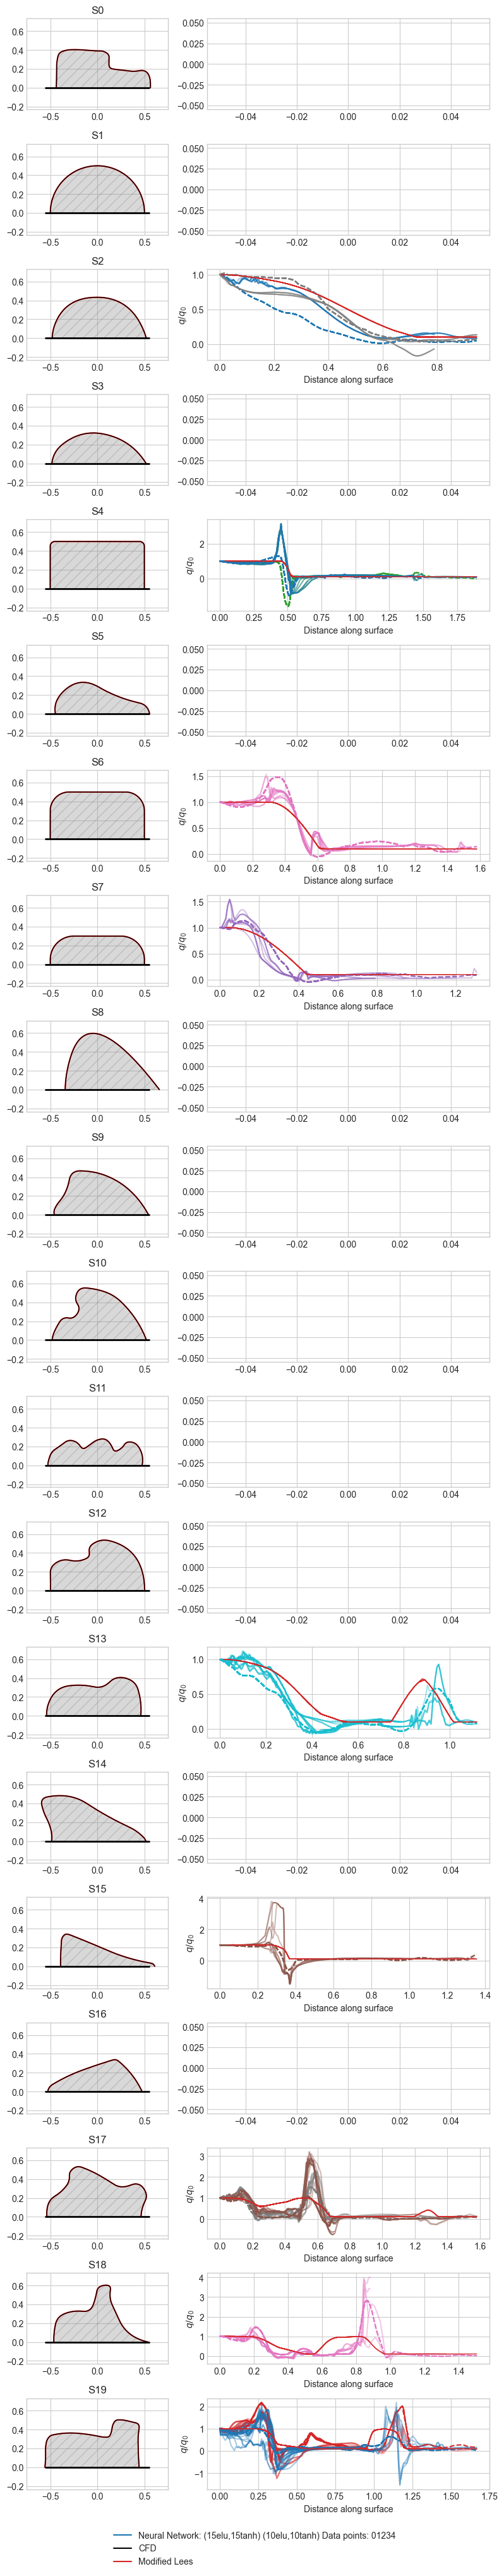

In [20]:
# ------------------------------- Plot results --------------------------------------
filename_list = ['MachineLearning/outputs/138,Prim15elu,15tanh,_10elu,10tanh,01234']
shapes_to_run = list(range(20))
shapes_to_run.sort()
n = len(shapes_to_run)
fig = plt.figure(figsize=(8, n*2))
gs = gridspec.GridSpec(n,2, width_ratios=(2,4))

error_list = list()
alt_list = list()
shapes = list()


for k, filename in enumerate(filename_list):
    
    shapes=list()
    with open(filename, 'rb') as file:
        for predict_sets in  pickle.load(file):
            [test_set, train_set] = predict_sets
            for set in test_set:
                shape = set.shape
                case = set.case
                if not shape in shapes_to_run:
                    continue

                i = shapes_to_run.index(shape)
                ax2 = plt.subplot(gs[i*2+1])
                ax2.set_ylabel(r'${q}/{q_0}$')
                ax2.set_xlabel('Distance along surface')
                # 0.1 + 0.9 cos(theta)
                a = set.input[1:,2]
                a[a>np.pi/2] = np.pi/2
                c = 0.1 + 0.9 * np.cos(a)
                alt_list.append(  (abs( set.output[1:] - c )* set.input[1:,1]).sum()   )

                # Prediction
                ax2.plot(set.input[:,0], set.output,f'--C{case%10}')
                ax2.plot(set.input[:,0], [1, *set.predict],f'C{case}', alpha = 0.4)
                ax2.plot(set.input[1:,0], c, 'C3',linewidth = 1)
                error_list.append( (abs(set.output[1:] - set.predict)* set.input[1:,1]).sum()  )
            
for i, shape in enumerate(shapes_to_run):        
    pos = np.array((0,0))
    if shape == 14: pos = np.array((-0.15,0))
    coor = md.load_shape(f'Data/Constant_set/S{shape}/shape',pos)
    ax1 = plt.subplot(gs[i*2])
    ax1.set_title(f'S{shape}')
    ax1.plot(coor[:,0], coor[:,1], 'r')
    ax1.plot(coor[:,0], coor[:,1], 'k', linewidth=1)
    ax1.fill_between(coor[:,0], coor[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.3, hatch='//')
    ax1.axis('equal')
    ax1.plot([-0.55,0.55],[0,0], 'k', linewidth=2)
    ax1.set_ylim(-0.3, 0.8)
    ax1.set_xlim(-0.75,0.75)
    outputs = np.load(f'Data/Constant_set/S{shape}.npy')
    #ax2 = plt.subplot(gs[i*2+1])
    #ax2.plot(outputs[:,0], outputs[:,1]/outputs[0,1], 'k')
   

for i in range(n):
    ax2 = plt.subplot(gs[i*2+1])
    for name in filename_list:
        pattern = r'(\d+[a-zA-Z]+(?:,\d+[a-zA-Z]+)*)'
        matches = re.findall(pattern, name)
        parts = name.split(',')
        result = parts[-1].strip()
        ax2.plot([],[], label=f'Neural Network: ({matches[0]}) ({matches[1]}) Data points: {result}')

    ax2.plot([],[], 'k', label = 'CFD')
    ax2.plot([],[], 'C3', label='Modified Lees')
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0))    
plt.tight_layout()

In [8]:
# ---------------------------- load model -----------------------------------------
import tensorflow as tf
fig, ax = plt.subplots(4,figsize=(8,8))
model = tf.keras.models.load_model('MachineLearning/Initial_model.h5')
structure = [0,1,2,3,4]
test_id = [3, 5, 12, 17]
with open('MachineLearning/training_data', 'rb') as file:
    data_set = pickle.load(file)

# ------------ make training / test set
test_input = list()
train_input = list()
test_output = list()
train_output = list()
test_sets = list()
train_sets = list()
for set in data_set:
    if set.shape == 14: continue
    if set.shape in test_id:
        test_input.append(set.input[:,structure])
        test_output.append(set.output)
        test_sets.append(set)
        continue
    train_input.append(set.input[:,structure])
    train_output.append(set.output)
    train_sets.append(set)

train_input = np.array(train_input)
train_output = np.array(train_output)
test_input = np.array(test_input)
test_output = np.array(test_output)

y = model.predict(test_input)



2/2 [==============================] - 3s 9ms/step


(48, 80)

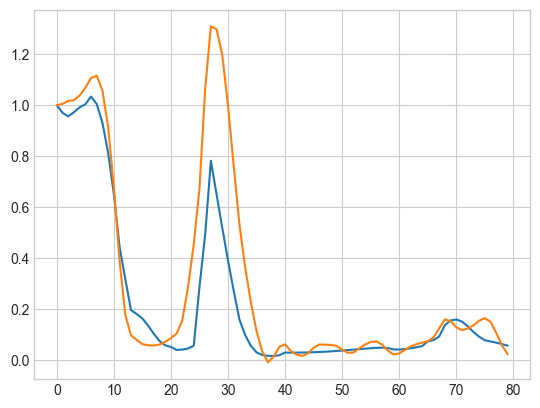